#### Question 1

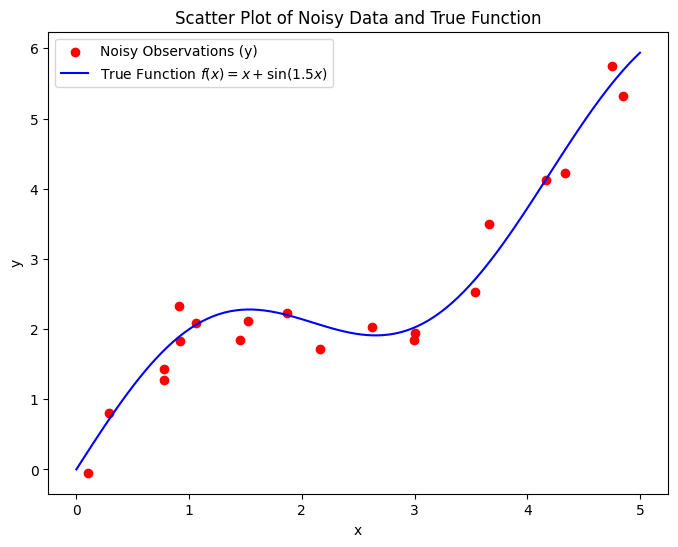

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# define the true function
def f(x):
    return x + np.sin(1.5 * x)

# generating dataset
np.random.seed(42)  # arbitrarily selected 42 to ensure reproducibility
x_train = np.sort(np.random.uniform(0, 5, 20))  # 20 random x values between 0 and 5
y_train = f(x_train) + np.random.normal(0, 0.3, size=x_train.shape)  

# smooth line for the true function
x_smooth = np.linspace(0, 5, 100)
y_smooth = f(x_smooth)

# plotting the dataset and true function
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label="Noisy Observations (y)", color='red')
plt.plot(x_smooth, y_smooth, label="True Function $f(x) = x + \sin(1.5x)$", color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Noisy Data and True Function")
plt.legend()
plt.show()


#### Question 2

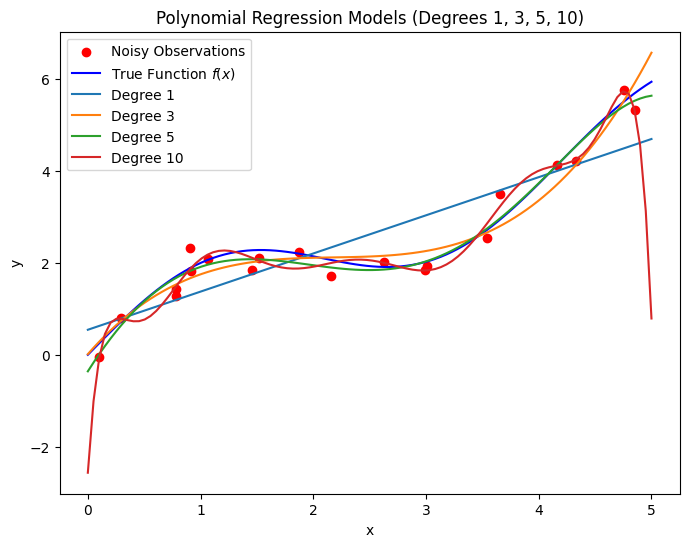

In [4]:
# define polynomial degrees to test
degrees = [1, 3, 5, 10]

# plotting dataset and true function
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label="Noisy Observations", color='red')
plt.plot(x_smooth, y_smooth, label="True Function $f(x)$", color='blue')

# fit and plot polynomial regression models
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(x_train.reshape(-1, 1))
    X_poly_smooth = poly.transform(x_smooth.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_pred_smooth = model.predict(X_poly_smooth)
    
    plt.plot(x_smooth, y_pred_smooth, label=f"Degree {d}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression Models (Degrees 1, 3, 5, 10)")
plt.legend()
plt.show()



In the graph above, the polynomial of degree 1 is underfitting, since it is just a straight line that is unable to capture the overall curve of the data points, and the polynomial of degree 10 is overfitting since the curve follows the noise in the data points too closely, showing high variance. 

#### Question 3 (a)

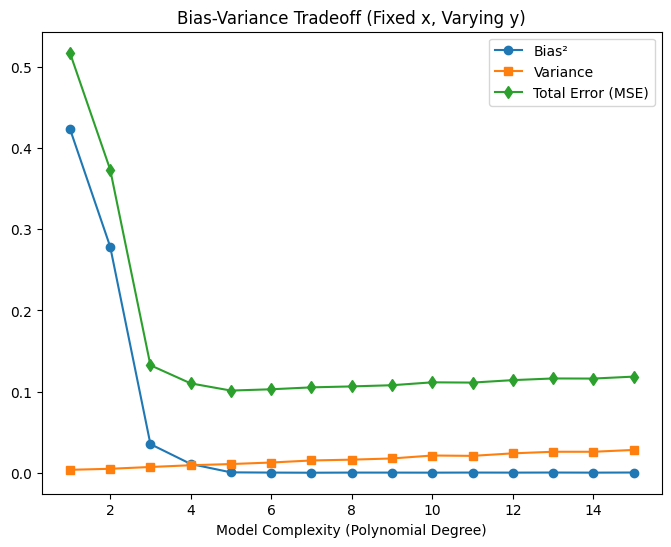

In [5]:
# setting a fixed random seed for reproducibility
np.random.seed(42)

num_points = 50  # total number of points
num_datasets = 100  # number of datasets
degrees = np.arange(1, 16)  # polynomial degrees to test

# define true function
def f(x):
    return x + np.sin(1.5 * x)

# using first method: fixed x, varying y
x_fixed = np.sort(np.random.uniform(0, 5, num_points))  # fixed x values for all datasets
y_fixed_true = f(x_fixed)

bias2_fixed_x = []
variance_fixed_x = []
mse_fixed_x = []

for d in degrees:
    predictions = []
    
    for _ in range(num_datasets):
        y_noisy = y_fixed_true + np.random.normal(0, 0.3, size=x_fixed.shape)  # different noise each dataset
        
        poly = PolynomialFeatures(degree=d)
        X_poly = poly.fit_transform(x_fixed.reshape(-1, 1))
        
        model = LinearRegression()
        model.fit(X_poly, y_noisy)
        
        predictions.append(model.predict(X_poly))  # predictions on fixed x
    
    predictions = np.array(predictions)
    mean_prediction = np.mean(predictions, axis=0)
    
    bias2_fixed_x.append(np.mean((mean_prediction - y_fixed_true) ** 2))
    variance_fixed_x.append(np.mean(np.var(predictions, axis=0)))
    mse_fixed_x.append(bias2_fixed_x[-1] + variance_fixed_x[-1] + 0.3**2)  # adding noise variance

plt.figure(figsize=(8, 6))
plt.plot(degrees, bias2_fixed_x, label="Bias²", marker='o')
plt.plot(degrees, variance_fixed_x, label="Variance", marker='s')
plt.plot(degrees, mse_fixed_x, label="Total Error (MSE)", marker='d')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.title("Bias-Variance Tradeoff (Fixed x, Varying y)")
plt.legend()
plt.show()

In [6]:
# find the best model using first method (degree with smallest test error)
best_degree_fixed_x = degrees[np.argmin(mse_fixed_x)]
best_bias2_fixed_x = bias2_fixed_x[np.argmin(mse_fixed_x)]
best_variance_fixed_x = variance_fixed_x[np.argmin(mse_fixed_x)]
best_mse_fixed_x = mse_fixed_x[np.argmin(mse_fixed_x)]

print(f"Best Model: Polynomial Degree {best_degree_fixed_x}")
print(f"Bias²: {best_bias2_fixed_x:.5f}")
print(f"Variance: {best_variance_fixed_x:.5f}")
print(f"Total Error (MSE): {best_mse_fixed_x:.5f}")

Best Model: Polynomial Degree 5
Bias²: 0.00051
Variance: 0.01074
Total Error (MSE): 0.10125


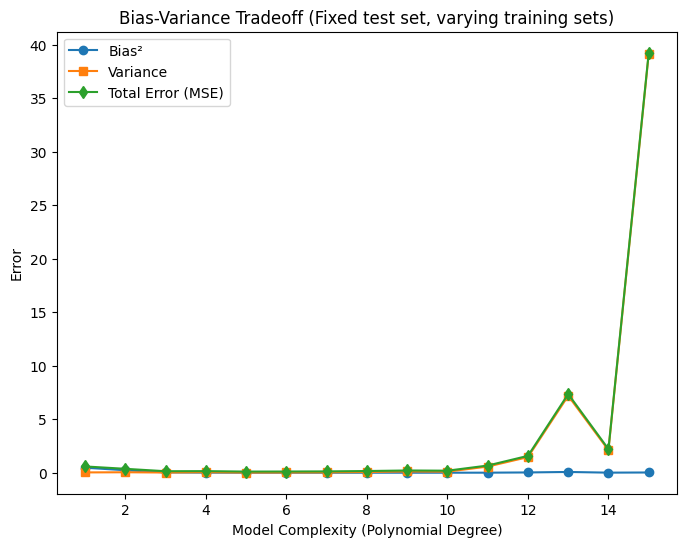

In [7]:
# setting a fixed random seed for reproducibility
np.random.seed(42)

num_points = 50   # total number of points
num_datasets = 100  # number of datasets
degrees = np.arange(1, 16)  # polynomial degrees to test


# using second method: fixed test set, varying training sets
x_test = np.sort(np.random.uniform(0, 5, 10))  # fixed test x values
y_test_true = f(x_test)

bias2_vary_x = []
variance_vary_x = []
mse_vary_x = []

for d in degrees:
    predictions = []

    for _ in range(num_datasets):
        # sample a training set (size 40), ensuring it does not overlap with x_test
        x_train = np.sort(np.random.choice(np.linspace(0, 5, 1000), size=40, replace=False))
        while any(x in x_test for x in x_train):  # ensure no overlap
            x_train = np.sort(np.random.choice(np.linspace(0, 5, 1000), size=40, replace=False))

        y_train = f(x_train) + np.random.normal(0, 0.3, size=x_train.shape)

        poly = PolynomialFeatures(degree=d)
        X_poly_train = poly.fit_transform(x_train.reshape(-1, 1))
        X_poly_test = poly.transform(x_test.reshape(-1, 1))

        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        predictions.append(model.predict(X_poly_test))

    predictions = np.array(predictions)
    mean_prediction = np.mean(predictions, axis=0)

    bias2_vary_x.append(np.mean((mean_prediction - y_test_true) ** 2))
    variance_vary_x.append(np.mean(np.var(predictions, axis=0)))
    mse_vary_x.append(bias2_vary_x[-1] + variance_vary_x[-1] + 0.3**2)  # adding noise variance

plt.figure(figsize=(8, 6))
plt.plot(degrees, bias2_vary_x, label="Bias²", marker='o')
plt.plot(degrees, variance_vary_x, label="Variance", marker='s')
plt.plot(degrees, mse_vary_x, label="Total Error (MSE)", marker='d')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff (Fixed test set, varying training sets)")
plt.legend()
plt.show()


In [8]:
# find the best model using second method (degree with smallest test error)
best_degree_vary_x = degrees[np.argmin(mse_vary_x)]
best_bias2_vary_x = bias2_vary_x[np.argmin(mse_vary_x)]
best_variance_vary_x = variance_vary_x[np.argmin(mse_vary_x)]
best_mse_vary_x = mse_vary_x[np.argmin(mse_vary_x)]

print(f"Best Model: Polynomial Degree {best_degree_vary_x}")
print(f"Bias²: {best_bias2_vary_x:.5f}")
print(f"Variance: {best_variance_vary_x:.5f}")
print(f"Total Error (MSE): {best_mse_vary_x:.5f}")

Best Model: Polynomial Degree 5
Bias²: 0.00053
Variance: 0.01615
Total Error (MSE): 0.10668


#### Question 3 (b)

Based on both sampling methods, the best model is a polynomial of degree 5, as it results in the lowest mean squared error (MSE) on the test set. 

Using the fixed test set method, the model has: 

Bias²: 0.00051

Variance: 0.01074

 Error (MSE): 0.10125

Using the varying test set method, the model has: 

Bias²: 0.00053

Variance: 0.01615

Total Error (MSE): 0.10668

As we can see, although both methods identify a polynomial of degree 5 as the best model, the error values slightly differ due to the different ways in which the test set was sampled. The fixed test set method results in a slightly lower MSE, which indicates that this method may lead to a more stable estimate of the best polynomial degree. However, the varying test set method provides a more general evaluation of how the model performs across different test sets, which makes it a useful comparison. Overall, just by looking at both graphs, we could say that any polynomial of degrees 4-10 would be a reasonable choice for a model as the polynomials within those degrees all have relatively low bias^2, variance, and MSE values, which means that those models would be able to capture the underlying function while also generalizing well to the test data. 